# Mathematical Underpinnings - Lab 4

In [2]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, pearsonr
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import mutual_info_score
import seaborn as sns
import pandas as pd

Correlation: $X \perp Y \Rightarrow Cor(X, Y) = 0$  
MI: $X \perp Y \Leftrightarrow MI(X, Y) = 0$ 

In [20]:
sns.set_theme()
np.random.seed(517)

## Task 1

### a)

#### bp 1)

In [3]:
# a heatmap
# you may use pcolormesh function and draw a heatmap for a sample
# or draw a heatmap for a teoretic density function

# I give you an answer to that task, because it may take too much time to do it during labs. 

In [4]:
def plot_xyz(data_2d, nbins=300):
    x = data_2d[:,0]
    y = data_2d[:,1]
    k = gaussian_kde([x, y])
    xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    return xi, yi, zi

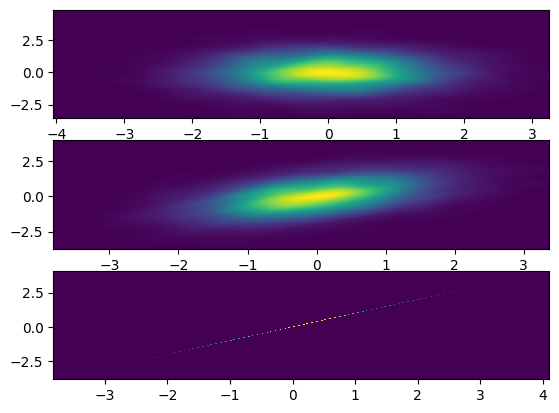

In [6]:
fig, axs = plt.subplots(3)

n = 5000

data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0], [0, 1]]), n)
xi_0, yi_0, zi_0 = plot_xyz(data_2d)
data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0.5], [0.5, 1]]), n)
xi_1, yi_1, zi_1 = plot_xyz(data_2d)
data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 1], [1, 1]]), n)
xi_2, yi_2, zi_2 = plot_xyz(data_2d)
 
# Make the plot
axs[0].pcolormesh(xi_0, yi_0, zi_0.reshape(xi_0.shape), shading='auto')
axs[1].pcolormesh(xi_1, yi_1, zi_1.reshape(xi_1.shape), shading='auto')
axs[2].pcolormesh(xi_2, yi_2, zi_2.reshape(xi_2.shape), shading='auto')
plt.show()

#### bp 2)

In [12]:
def get_sample(rho, n):
    x, y = np.random.multivariate_normal(
        np.zeros(2), np.array([[1, rho], [rho, 1]]), n).T
    return x, y

def discretize(x, n_bins):
    return np.digitize(x, np.linspace(x.min(), x.max(), n_bins))

def get_rho(x, y):
    return pearsonr(x, y).statistic

def get_mi(x, y):
    return mutual_info_classif(
        x.reshape(-1, 1), y, discrete_features = True)[0]

In [17]:
rho = 0.5
n = 1000
n_bins = 10
x, y = get_sample(rho, n)
x_disc, y_disc = discretize(x, n_bins), discretize(y, n_bins)
f'Correlation: {get_rho(x_disc, y_disc)}, MI: {get_mi(x_disc, y_disc)}'

'Correlation: 0.49652514745361354, MI: 0.17734587045910957'

#### bp 3)

In [18]:
rho_sequence = np.linspace(0, 0.9, 20)
n_obs = 1000
n_reps = 100

results = []
for rho in rho_sequence:
    for repeat in range(n_reps):
        x, y = get_sample(rho, n)
        x_disc, y_disc = discretize(x, n_bins), discretize(y, n_bins)
        rho_hat = get_rho(x_disc, y_disc)
        mi_hat = get_mi(x_disc, y_disc)
        res_iter = {
                "rho": rho,
                "repeat": repeat,
                "rho_hat": rho_hat,
                "mi_hat": mi_hat}
        results.append(res_iter)

results = pd.DataFrame(results)
results

,rho,repeat,rho_hat,mi_hat
0,0.0,0,-0.011121,0.027927
1,0.0,1,-0.026004,0.028990
2,0.0,2,0.002919,0.032994
3,0.0,3,-0.069222,0.033783
4,0.0,4,0.031823,0.042919
...,...,...,...,...
1995,0.9,95,0.848156,0.653149
1996,0.9,96,0.866789,0.701608
1997,0.9,97,0.869338,0.715436
1998,0.9,98,0.849681,0.657482


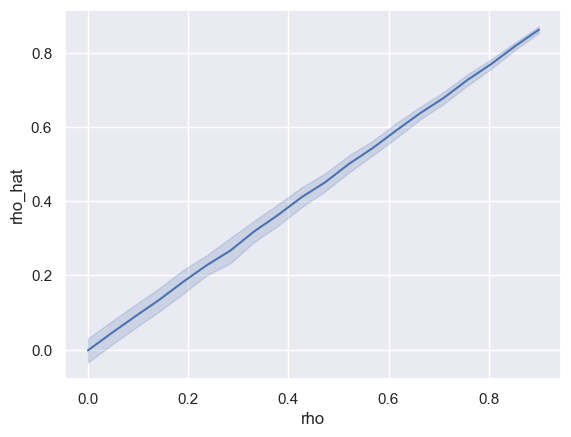

In [21]:
sns.lineplot(results, x = "rho", y = "rho_hat", errorbar = "sd");

#### bp 4)

A hint: note that mutual information between two correlated normal distributions i.e. when $(X, Y)\sim \mathcal{N}((0,0)', \Sigma)$ and
$$\Sigma = \begin{pmatrix}
        \sigma_x^2 & \rho \\ \rho & \sigma_y^2
    \end{pmatrix}$$
equals
$$I(X,Y) = \frac{1}{2}\log \left(\frac{\sigma_x^2\sigma_y^2}{\sigma_x^2\sigma_y^2 - \rho^2}\right).$$

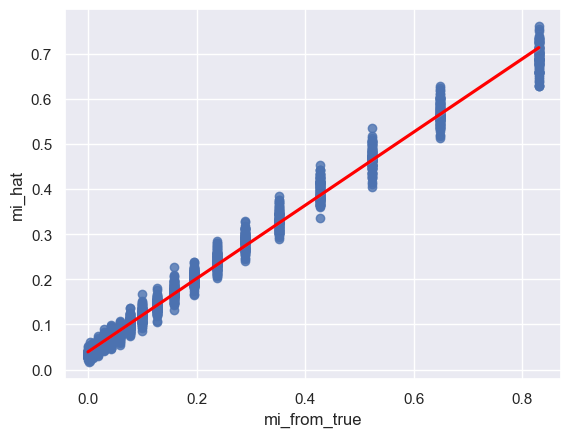

In [23]:
sns.regplot(
    results, 
    x = "mi_from_true", 
    y = "mi_hat", 
    line_kws = {"color": "red"});

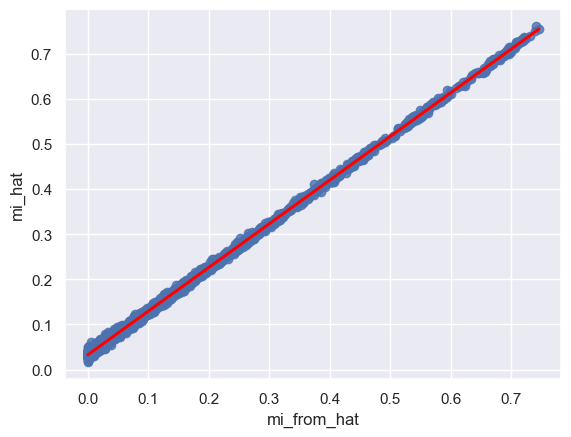

In [24]:
sns.regplot(
    results, 
    x = "mi_from_hat", 
    y = "mi_hat", 
    line_kws = {"color": "red"});

### b)

#### bp 1)

In [6]:
# again: this is too time consuming so here is an answer

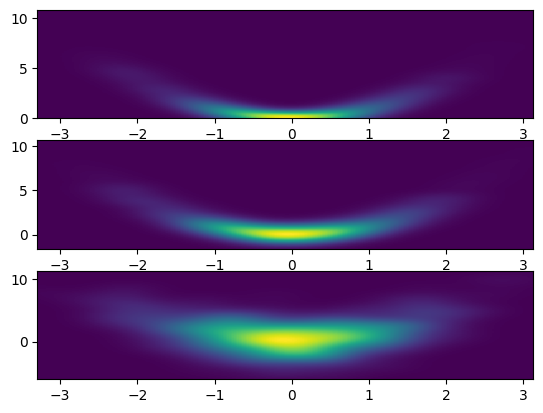

In [7]:
fig, axs = plt.subplots(3)

n = 1000
x = np.random.normal(0, 1, n)

data_2d = np.array([x, x**2 + np.random.normal(0, 0, n)]).T
xi_0, yi_0, zi_0 = plot_xyz(data_2d)
data_2d = np.array([x, x**2 + np.random.normal(0, 0.5, n)]).T
xi_1, yi_1, zi_1 = plot_xyz(data_2d)
data_2d = np.array([x, x**2 + np.random.normal(0, 2, n)]).T
xi_2, yi_2, zi_2 = plot_xyz(data_2d)
 
# Make the plot
axs[0].pcolormesh(xi_0, yi_0, zi_0.reshape(xi_0.shape), shading='auto')
axs[1].pcolormesh(xi_1, yi_1, zi_1.reshape(xi_1.shape), shading='auto')
axs[2].pcolormesh(xi_2, yi_2, zi_2.reshape(xi_2.shape), shading='auto')
plt.show()

#### bp 2) and 3)

In [25]:
def get_sample(sigma, n):
    x = np.random.standard_normal(n)
    y = x ** 2 + np.random.normal(0, sigma, n)
    return x, y

In [27]:
sigma = 1
n = 1000
n_bins = 10
x, y = get_sample(sigma, n)
x_disc, y_disc = discretize(x, n_bins), discretize(y, n_bins)
f'Correlation: {get_rho(x_disc, y_disc)}, MI: {get_mi(x_disc, y_disc)}'

'Correlation: -0.0561905898939072, MI: 0.34519044469313825'

In [29]:
sigma_seq = np.linspace(0, 2, 30)
n_obs = 1000
n_reps = 100
rep_range = range(n_reps)

results = []

for sigma in sigma_seq:
    for repeat in rep_range:
        x, y = get_sample(sigma, n_obs)
        x_disc, y_disc = discretize(x, n_bins), discretize(y, n_bins)
        rho_hat = get_rho(x_disc, y_disc)
        mi_hat = get_mi(x_disc, y_disc)
        res_iter = {
                "sigma": sigma,
                "rep": repeat,
                "rho_hat": rho_hat,
                "mi_hat": mi_hat}
        results.append(res_iter)

results = pd.DataFrame(results)
results

,sigma,rep,rho_hat,mi_hat
0,0.0,0,-0.005464,0.500296
1,0.0,1,-0.027404,0.584003
2,0.0,2,-0.067812,0.750825
3,0.0,3,0.046154,0.503648
4,0.0,4,-0.073062,0.525827
...,...,...,...,...
2995,2.0,95,-0.027386,0.158698
2996,2.0,96,0.031547,0.177482
2997,2.0,97,-0.030151,0.169627
2998,2.0,98,-0.077718,0.182142


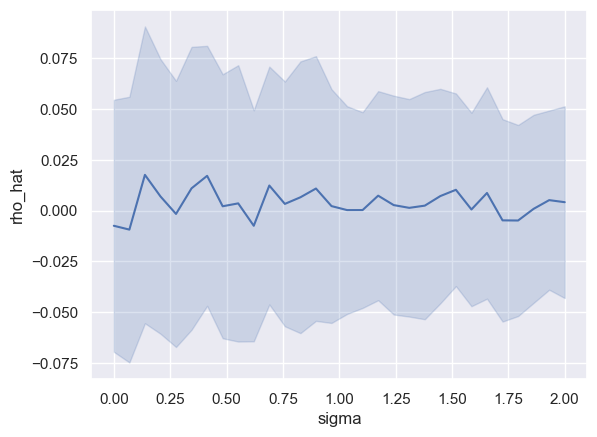

In [30]:
sns.lineplot(
    results, 
    x = "sigma", 
    y = "rho_hat", 
    errorbar = "sd");

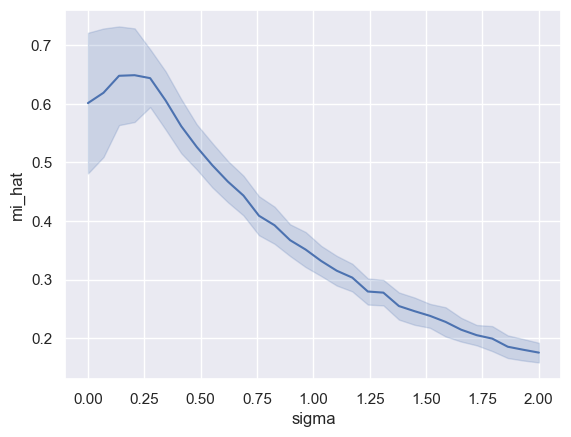

In [31]:
sns.lineplot(
    results, 
    x = "sigma", 
    y = "mi_hat", 
    errorbar = "sd");

## Task 2

### a)

In [32]:
from scipy.stats.contingency import crosstab

def asymptotic_independence_test(x, y, statistic, n_bins=10):
    n_samples = len(x)
    x = discretize(x, n_bins)
    y = discretize(y, n_bins)

    if statistic == "mi":
        stat_val = 2 * n_samples * get_mi(x, y)
    else:
        stat_val = chi2_contingency(crosstab(x, y).count).statistic

    p_value = chi2.sf(stat_val, (n_bins - 1) ** 2)
    return stat_val, p_value

### b)

In [33]:
def permutation_independence_test(x, y, B, n_bins=10):
    x = discretize(x, n_bins)
    y = discretize(y, n_bins)

    stat_val = get_mi(x, y)

    p_value = 1
    for _ in range(B):
        is_greater = get_mi(np.random.permutation(x), y) >= stat_val
        p_value += int(is_greater)
    p_value /= 1 + B

    return stat_val, p_value

### c)

**Independent r.v.**

A hint: two discretized independent normal random variables (or any two independent discrete r.v.)

In [34]:
# independent r.v. - we expect that our tests don't reject the null hypothesis

def get_sample(rho, n):
    x, y = np.random.multivariate_normal(
        np.zeros(2), np.array([[1, rho], [rho, 1]]), n).T
    return x, y

rho = 0
n_obs = 5000

x, y = get_sample(rho, n_obs)


In [35]:
asymptotic_independence_test(x, y, "mi")

(63.29156232017319, 0.9271039453225149)

In [36]:
asymptotic_independence_test(x, y, "chi2")

(69.68767323983987, 0.8107998499591891)

In [37]:
permutation_independence_test(x, y, 100)

(0.006329156232017319, 0.5445544554455446)

Assuming significance level of e.g. 0.05, all tests do not reject the null hypothesis.

**Dependent r.v.**

A hint: two discretized dependent normal random variables (or two categorical wuch that we enforce $X=Y$ for a subset of observations)

In [9]:
# independent r.v. - ideally we will reject the null hypothesis

In [38]:
rho = 0.5
n_obs = 5000

x, y = get_sample(rho, n_obs)

In [39]:
asymptotic_independence_test(x, y, "mi")

(1302.0492132605127, 2.0824904843831886e-219)

In [40]:
asymptotic_independence_test(x, y, "chi2")

(1518.2443822263656, 1.0084378233015449e-263)

In [41]:
permutation_independence_test(x, y, 100)

(0.13020492132605127, 0.009900990099009901)

Assuming significance level of e.g. 0.05, every test correctly rejects the null hypothesis.